# 📘 Loss Functions(损失函数)

## 1 什么是损失函数？

损失函数(Loss Function)是衡量模型输出 $\hat{y}$ 与真实标签 $y$ 之间差距的函数。

它告诉我们模型当前的“错误”程度。训练的目标就是不断优化参数，**最小化损失函数**。

---

## 2 为什么损失函数很重要？

- 是模型学习的目标函数
- 决定了训练方向（通过反向传播）
- 不同任务使用不同损失（回归 vs 分类）

---

## 3 损失函数 vs 评估指标

| 概念         | 作用                    | 示例 |
|--------------|-------------------------|------|
| **Loss Function** | 模型训练时最小化目标      | MSE, Cross-Entropy |
| **Evaluation Metric** | 评估模型性能，不参与反向传播 | Accuracy, F1, ROC-AUC |

---

## 4 分类 vs 回归中使用的损失函数

| 类型     | 常用损失函数                        |
|----------|-------------------------------------|
| 回归     | MSE, MAE                            |
| 分类（二类） | Cross-Entropy (Log Loss), Hinge Loss |
| 多分类   | Categorical Cross-Entropy, Softmax Loss |

## 📚 本笔记将系统学习以下常见损失函数：

### 🟦 回归任务常用损失函数
- **MSE**（Mean Squared Error，均方误差）
- **MAE**（Mean Absolute Error，平均绝对误差）
- **Huber Loss**（对异常值更鲁棒）
- **Log-Cosh Loss**（平滑版本的 MAE）

### 🟩 二分类任务常用损失函数
- **Binary Cross-Entropy**（对数损失 / 对数似然）
- **Hinge Loss**（用于 SVM）
- **Focal Loss**（用于类别不平衡问题）

### 🟨 多分类任务常用损失函数
- **Categorical Cross-Entropy**
- **Sparse Categorical Cross-Entropy**
- **Kullback–Leibler Divergence**（KL 散度）


回归Loss Function


### 1. MSE（Mean Squared Error，均方误差）

---

**定义**：SSE 是所有预测值与真实值之间误差的平方之和，是回归模型衡量拟合误差的重要指标之一。

$$
\text{SSE} = \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)^2
$$

**定义**：
MSE 衡量预测值与真实值的平方差的平均值，是最常见的回归损失函数之一。

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)^2
$$


---

**定义**：RMSE（均方根误差）是 MSE 的平方根，用于衡量预测值与真实值之间的平均差距，单位与原始目标值一致。

$$
\text{RMSE} = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)^2 }
$$

---

## 三者共有特性：

- 对大误差非常敏感（误差平方项）
- 对异常值（outlier）不鲁棒
- 全部是可导函数（适合用于梯度下降）

---

## 区别提示：

| 函数 | 是否平均 | 单位是否一致 | 实际应用 |
|------|----------|---------------|-----------|
| SSE  | ❌ 否（总和） | ❌（平方单位） | 回归推导中目标函数 |
| MSE  | ✅ 是      | ❌（平方单位） | 最常用训练 loss |
| RMSE | ✅ 是      | ✅ 是（与 $y$ 一致） | 用于报告或解释结果 |


**应用**：
- 房价预测、温度预测等连续值回归任务
- 神经网络的回归输出层常使用 MSE

---

📌 一句话理解：
> “MSE 是最常用的回归损失，重惩罚大误差。”

### MSE 在分类任务中的缺点（梯度消失）

当 MSE 配合 sigmoid 输出用于分类任务时，在输出靠近 0 或 1 时，其导数 $\sigma'(z)$ 接近 0，导致整体梯度趋近于 0，学习几乎停止。

这就是所谓的**梯度消失问题**，如下图所示（蓝线是 sigmoid，紫线是其导数）：

📉 解决方法：使用 **Cross-Entropy** 替代 MSE 可避免该问题。

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# 示例
y_true = np.array([3.0, 5.0, 2.5])
y_pred = np.array([2.5, 5.5, 2.0])

def mse(y_true, y_pred):
    """
    计算均方误差（MSE）

    参数:
    y_true -- 真实值，形如 (n_samples,)
    y_pred -- 预测值，形如 (n_samples,)

    返回:
    MSE 值（float）
    """
    return np.mean((y_true - y_pred) ** 2)


def rmse(y_true, y_pred):
    """
    计算均方根误差（RMSE）

    参数:
    y_true -- 真实值，形如 (n_samples,)
    y_pred -- 预测值，形如 (n_samples,)

    返回:
    RMSE 值（float）
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return np.sqrt(mse)

mse_hand = mse(y_true, y_pred)
print("MSE_hand =", mse_hand)

mse = mean_squared_error(y_true, y_pred)
print("MSE =", mse)



rmse_hand = rmse(y_true, y_pred)
print("RMSE_hand =", rmse_hand)
rmse = root_mean_squared_error(y_true, y_pred)
print("RMSE =", rmse)

MSE_hand = 0.25
MSE = 0.25
RMSE_hand = 0.5
RMSE = 0.5


### 2. MAE（Mean Absolute Error，平均绝对误差）

---

**定义**：MAE 衡量预测值与真实值之间绝对误差的平均值。相比 MSE，MAE 对于异常值更鲁棒（不会放大误差）。

$$
\text{MAE} = \frac{1}{m} \sum_{i=1}^{m} \left| y^{(i)} - \hat{y}^{(i)} \right|
$$

---

## 主要特性：

- ❌ 不放大大误差，对 outlier 更鲁棒  
- ❌ 不连续可导（在误差为 0 时不可导）  
- ✅ 同样用于回归问题，可度量平均误差的真实大小

---

## 与 MSE 的对比：

| 特性        | MSE                                | MAE                                |
|-------------|-------------------------------------|-------------------------------------|
| 异常值影响   | 高（放大误差） ✅                   | 低（线性响应） ✅                   |
| 可导性       | 连续可导 ✅                         | 在误差为 0 时不可导 ⚠️              |
| 优化难度     | 易于优化，常有解析解 ✅              | 对梯度下降不太友好，收敛较慢 ❌     |
| 解释性       | 单位为平方 ❌                        | 与目标值单位一致 ✅                  |

---

## 应用：

- 用于对异常值不敏感的回归任务
- 在业务指标更关注“平均偏离多少”而不是“偏离平方”的场景下

---

📌 一句话理解：

> “MAE 衡量误差的平均大小，鲁棒但不可导，适合对 outlier 敏感时使用。”


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# 人工模拟数据
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

# ✅ 手撕实现
def mae_manual(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# 🔧 sklearn 实现
mae_sklearn = mean_absolute_error(y_true, y_pred)

# 输出对比
print("Manual MAE:", mae_manual(y_true, y_pred))
print("Sklearn MAE:", mae_sklearn)


Manual MAE: 0.5
Sklearn MAE: 0.5


### 🔍 MSE vs. MAE 对比分析

| 属性 | MSE（均方误差） | MAE（平均绝对误差） |
|------|------------------|----------------------|
| **定义** | 平方差的平均值 | 绝对差的平均值 |
| **对误差的敏感度** | 对大误差更敏感，放大异常值影响（平方放大） | 各误差一视同仁，抗异常值能力更强 |
| **鲁棒性（Robust）** | 对离群点（outliers）敏感 | 对离群点更鲁棒 |
| **梯度特性** | 连续且可导，便于优化 | 在 $y = \hat{y}$ 处不可导，但可用次梯度处理 |
| **几何意义** | 最小化点到预测值的垂直距离的**平方和** | 最小化点到预测值的**绝对距离和** |
| **典型应用** | 回归训练阶段（如线性回归、神经网络），对精度敏感的任务 | 噪声较大数据、鲁棒回归、异常检测等任务 |

---

📌 **总结一句话：**

> **MSE** 放大大误差，更适合对精度要求高的场景；  
> **MAE** 更鲁棒，适用于含异常值或噪声较多的数据集。


### 3. Huber Loss（平滑绝对误差）

---

#### 📖 定义

Huber Loss 是一种结合了 MSE 与 MAE 优点的损失函数：

- 小误差时采用 **MSE**（平方损失）
- 大误差时采用 **MAE**（绝对值损失）

定义如下（$\delta$ 为阈值）：

$$
\mathcal{L}_\delta(y, \hat{y}) =
\begin{cases}
\frac{1}{2}(y - \hat{y})^2 & \text{if } |y - \hat{y}| \leq \delta \\\\
\delta \cdot \left( |y - \hat{y}| - \frac{1}{2} \delta \right) & \text{otherwise}
\end{cases}
$$

---

#### ⚙️ 参数说明

- $\delta$：切换点，决定误差多大时从 MSE 切换为 MAE
  - 默认通常设为 $1.0$
  - 越小越鲁棒，越大越平滑

---

#### ✅ 特性总结

| 特性               | 描述                                   |
|--------------------|----------------------------------------|
| 对离群值鲁棒性     | ✅ 高                                   |
| 是否连续可导       | ✅ 是（在所有点处都可导）               |
| 是否带单位         | ✅ 与标签单位一致                      |
| 平滑程度可调       | ✅ 通过 $\delta$ 控制平滑/鲁棒性权衡     |

---

#### 📌 一句话理解：

> “Huber Loss 是一位懂得平衡的损失函数 —— 小错较真，大错包容。”


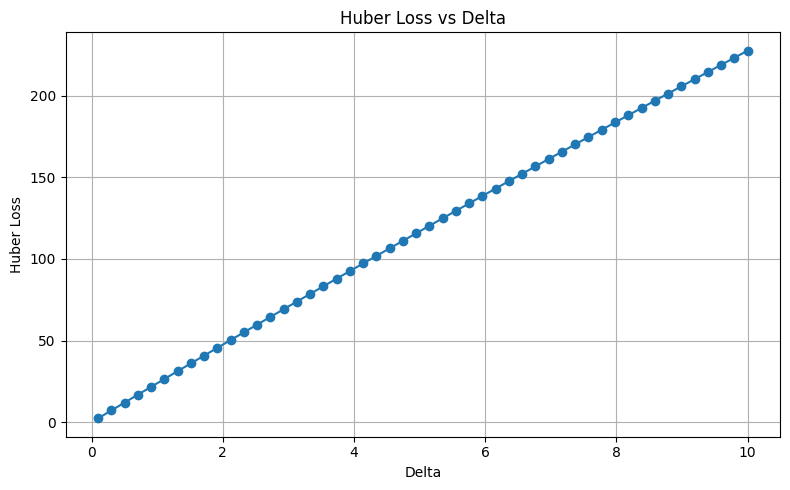

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def huber_loss(y_true, y_pred, delta=1.0):
    """
    实现 Huber Loss

    参数:
    y_true -- 真实值
    y_pred -- 预测值
    delta  -- 切换点，默认 1.0

    返回:
    平均 Huber Loss（float）
    """
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta

    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)

    return np.mean(np.where(is_small_error, squared_loss, linear_loss))


# 示例数据
y_true = np.array([1.0, 2.0, 3.0, 100.0])
y_pred = np.array([1.1, 1.9, 3.2, 4.0])

# 不同 delta 值下的 loss
deltas = np.linspace(0.1, 10, 50)
losses = [huber_loss(y_true, y_pred, delta=d) for d in deltas]

# 可视化
plt.figure(figsize=(8, 5))
plt.plot(deltas, losses, marker='o')
plt.title('Huber Loss vs Delta')
plt.xlabel('Delta')
plt.ylabel('Huber Loss')
plt.grid(True)
plt.tight_layout()
plt.show()


### 4. Log-Cosh Loss（对数双曲余弦损失）

---

#### 📖 定义

Log-Cosh Loss 是一种介于 **MSE** 与 **MAE** 之间的平滑损失函数：

- 当误差很小时，它近似于 $\frac{1}{2}(y - \hat{y})^2$（即 MSE）
- 当误差很大时，它近似于 $|y - \hat{y}|$（即 MAE）

定义如下：

$$
\mathcal{L}_{\text{logcosh}} = \sum_{i=1}^m \log \left( \cosh\left( y^{(i)} - \hat{y}^{(i)} \right) \right)
$$

其中：

- $\cosh(x) = \frac{e^x + e^{-x}}{2}$ 是双曲余弦函数
- $\log(\cosh(x))$ 在 $x \to 0$ 附近近似为 $\frac{x^2}{2}$，而 $x \to \infty$ 时近似为 $|x|$

---

#### ✅ 特性总结

| 特性             | 描述                                              |
|------------------|---------------------------------------------------|
| 对 outlier 鲁棒  | ✅（近似 MAE）                                     |
| 是否连续可导     | ✅（相比 MAE 更适合梯度下降）                     |
| 数值稳定性       | ✅（相比 Huber 更平滑，无需手动调 delta）         |
| 训练表现         | ✅ 回归任务中效果稳定，适用于含轻微噪声的数据      |

---

#### 📌 一句话理解：

> “Log-Cosh 是一个自动平衡 MSE 和 MAE 的平滑损失函数：小误差近似 MSE，大误差近似 MAE。”


In [ ]:
import numpy as np

def log_cosh_loss(y_true, y_pred):
    """
    实现 log-cosh 损失函数

    参数:
    y_true -- 真实标签数组 (n,)
    y_pred -- 预测值数组 (n,)

    返回:
    平均 log-cosh 损失（float）
    """
    error = y_pred - y_true
    return np.mean(np.log(np.cosh(error)))  # 直接调用 numpy 的稳定实现

# 示例
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

loss = log_cosh_loss(y_true, y_pred)
print("Log-Cosh Loss =", loss)


Log-Cosh Loss = 0.1685024610998955


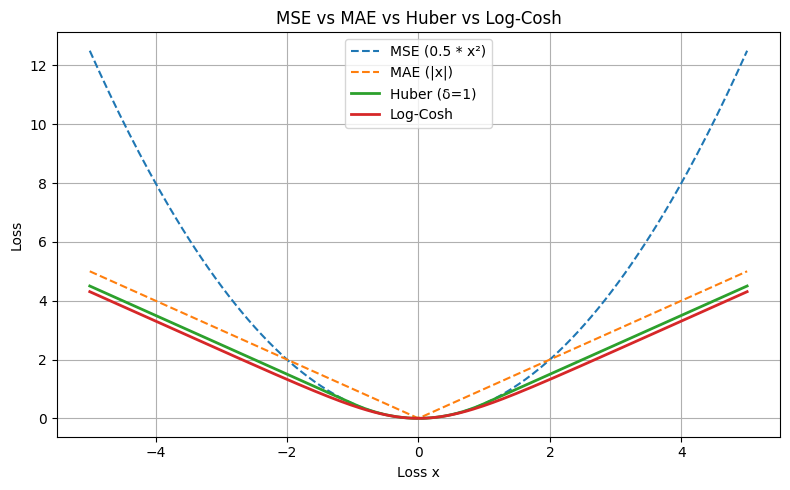

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义误差范围
x = np.linspace(-5, 5, 200)

# 计算不同损失函数的值
mse = 0.5 * x**2
mae = np.abs(x)
huber = np.where(np.abs(x) <= 1.0, 0.5 * x**2, 1.0 * (np.abs(x) - 0.5))
logcosh = np.log(np.cosh(x))

# 画图
plt.figure(figsize=(8, 5))
plt.plot(x, mse, label="MSE (0.5 * x²)", linestyle="--")
plt.plot(x, mae, label="MAE (|x|)", linestyle="--")
plt.plot(x, huber, label="Huber (δ=1)", linewidth=2)
plt.plot(x, logcosh, label="Log-Cosh", linewidth=2)
plt.title("MSE vs MAE vs Huber vs Log-Cosh")
plt.xlabel("Loss x")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


分类损失函数

### 5. Binary Cross-Entropy（二元交叉熵 / 对数损失）

---

#### 📖 定义

Binary Cross-Entropy（BCE）用于二分类任务，衡量预测概率 $\hat{y}$ 与真实标签 $y \in \{0, 1\}$ 的差异。

其定义为：

$$
\mathcal{L}_{\text{BCE}} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

其中：
- $\hat{y}^{(i)}$ 是第 $i$ 个样本属于正类的预测概率（通常为 sigmoid 输出）
- $y^{(i)} \in \{0, 1\}$ 是真实标签

---

#### ✅ 特性总结

| 特性               | 描述                                                 |
|--------------------|------------------------------------------------------|
| 输出限制           | 预测值 $\hat{y} \in (0, 1)$，需搭配 sigmoid 激活       |
| 对预测置信度敏感   | 预测错误且置信度越高，惩罚越大                       |
| 是否连续可导       | ✅ 是                                                  |
| 是否鲁棒           | ❌ 对 outlier 样本（错得离谱）惩罚大                  |

---

#### 📌 一句话理解：

> “Binary Cross-Entropy 逼迫模型尽可能接近真实标签的概率分布，是分类中的黄金标准。”


In [ ]:
import numpy as np
from sklearn.metrics import log_loss

def binary_cross_entropy(y_true, y_pred, eps=1e-15):
    """
    手撕实现 Binary Cross-Entropy 损失

    参数:
    y_true -- 真实标签，值为 0 或 1
    y_pred -- 模型输出的预测概率（0~1 之间）
    eps -- 防止 log(0) 的数值稳定项

    返回:
    平均 BCE 损失
    """
    y_pred = np.clip(y_pred, eps, 1 - eps)  # 防止 log(0)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

# 示例
y_true = np.array([0, 1, 1, 0])
y_pred = np.array([0.1, 0.9, 0.8, 0.2])

# 手撕版本
bce_manual = binary_cross_entropy(y_true, y_pred)

# sklearn 对比
bce_sklearn = log_loss(y_true, y_pred)

print("Manual BCE:", bce_manual)
print("Sklearn BCE:", bce_sklearn)


Manual BCE: 0.164252033486018
Sklearn BCE: 0.164252033486018


In [ ]:
#非binary情况Cross-Entropy实现
#Pytorch BCE Loss 也能实现

import numpy as np
from sklearn.metrics import log_loss

def categorical_cross_entropy(y_true, y_pred, eps=1e-15):
    """
    手撕实现 Categorical Cross-Entropy (CCE)

    参数:
    y_true -- shape (n_samples, n_classes)，one-hot 真实标签
    y_pred -- shape (n_samples, n_classes)，softmax 预测概率
    eps -- 防止 log(0)

    返回:
    平均交叉熵损失
    """
    y_pred = np.clip(y_pred, eps, 1 - eps)
    loss = -np.sum(y_true * np.log(y_pred), axis=1)
    return np.mean(loss)

# 示例
y_true = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])  # 3 个样本，每个是 one-hot 编码

y_pred = np.array([
    [0.8, 0.1, 0.1],
    [0.1, 0.7, 0.2],
    [0.1, 0.2, 0.7]
])  # softmax 输出

# 手撕版本
cce_manual = categorical_cross_entropy(y_true, y_pred)

# sklearn 版本（需要标签索引）
labels = np.array([0, 1, 2])  # 类别索引
cce_sklearn = log_loss(labels, y_pred, labels=[0, 1, 2])

print("Manual Categorical CE:", cce_manual)
print("Sklearn Categorical CE:", cce_sklearn)

Manual Categorical CE: 0.3121644797305582
Sklearn Categorical CE: 0.3121644797305582


### 6. KL 散度（Kullback-Leibler Divergence）

---

#### 📖 定义

KL 散度衡量两个概率分布之间的“距离”（信息损失），不对称地衡量“从分布 $Q$ 逼近真实分布 $P$ 有多差”。

数学定义如下：

$$
D_{KL}(P \| Q) = \sum_{i} P(i) \log \frac{P(i)}{Q(i)}
$$

- $P$：真实分布（ground truth / teacher / soft label）
- $Q$：预测分布（通常是模型 softmax 输出）


---

#### ✅ 特性总结

| 特性             | 描述                                           |
|------------------|------------------------------------------------|
| 是否对称         | ❌ 不对称：$D_{KL}(P \| Q) \neq D_{KL}(Q \| P)$ |
| 最小值           | $\min D_{KL} = 0$，当 $P = Q$ 时取到             |
| 可用于 soft label| ✅ 非 one-hot 标签（如知识蒸馏）                |
| 输出要求         | 两个输入都必须是概率分布（总和为 1）            |

---

#### 🔁 与 Cross-Entropy 的关系

交叉熵：

$$
H(P, Q) = -\sum P(i) \log Q(i)
$$

与 KL 的关系：

$$
D_{KL}(P \| Q) = H(P, Q) - H(P)
$$

---


其中：

- $H(P) = -\sum_i P(i) \log P(i)$   —— **真实分布 $P$ 的熵**，代表“在知道真实分布的前提下，压缩数据的最优信息量”。
- $H(P, Q) = -\sum_i P(i) \log Q(i)$ —— **交叉熵**，代表“用预测分布 $Q$ 编码真实样本 $P$ 时的平均代价”。

---

#### 🧠 直观理解：

| 符号         | 含义                                           |
|--------------|------------------------------------------------|
| $H(P)$       | 自己知道标签时，最优压缩所需信息（不可导）     |
| $H(P, Q)$    | 用模型预测去编码真实标签所需的信息量           |
| $D_{KL}$     | 因为模型不准，**多浪费的那部分信息**            |

---

📌 所以在训练中：

- \( H(P) \) 是常数（因为标签固定），无法优化
- **最小化 KL 散度 ⇔ 最小化 Cross Entropy**

也就是说，**我们通常使用交叉熵作为损失函数**，实质上是在最小化模型预测分布与真实分布之间的 KL 散度。

即：**KL = 交叉熵 - 熵**，在 $P$ 固定时，最小化 KL 等价于最小化交叉熵。

---

#### 📌 一句话理解：

> “KL 散度告诉我们预测分布 $Q$ 离真实分布 $P$ 差了多少信息量。”


In [1]:
import numpy as np
from scipy.special import softmax

def kl_divergence(P, Q, eps=1e-15):
    """
    计算 KL 散度 D_KL(P || Q)

    参数:
    P -- shape (n_samples, n_classes)，真实分布
    Q -- shape (n_samples, n_classes)，预测分布（softmax 输出）
    eps -- 防止 log(0)

    返回:
    每个样本的 KL 散度均值
    """
    P = np.clip(P, eps, 1)
    Q = np.clip(Q, eps, 1)
    kl = P * np.log(P / Q)
    return np.mean(np.sum(kl, axis=1))

# 示例：soft label
P = np.array([
    [0.9, 0.1],
    [0.3, 0.7]
])

Q = np.array([
    [0.6, 0.4],
    [0.4, 0.6]
])

loss = kl_divergence(P, Q)
print("KL Divergence:", loss)


KL Divergence: 0.12394500766445271


### 7. Focal Loss（聚焦损失函数）

---

#### 📖 背景动机

在很多真实场景中（如目标检测、欺诈识别、医疗诊断），**样本类别分布严重不均衡**，例如：

- 负类远多于正类
- 模型极易被“容易样本”主导，忽略少数关键样本

传统的 **Binary Cross-Entropy（BCE）** 不区分容易/困难样本，会导致模型**“懒惰地”优化**

---

#### 🧠 核心思想

Focal Loss = **让模型更关注困难样本（hard examples）**

- **对容易分类的样本**：降低其损失权重
- **对难以分类的样本**：放大其损失权重

---

#### ✅ 定义公式（针对二分类）

设：

- $y \in \{0, 1\}$ 是真实标签
- $\hat{y} \in (0, 1)$ 是预测概率（来自 sigmoid）

Focal Loss 定义为：

$$
\text{FL}(y, \hat{y}) = - \alpha_t (1 - p_t)^{\gamma} \log(p_t)
$$

其中：

- $p_t = \begin{cases} \hat{y} & \text{if } y = 1 \\\\ 1 - \hat{y} & \text{if } y = 0 \end{cases}$
- $\alpha_t$ 是正负样本的平衡因子（可选）
- $\gamma$ 是 **聚焦因子（focusing parameter）**，控制对难样本的关注程度

---

#### 🎛️ 参数解释

| 参数     | 默认值 | 控制作用 |
|----------|--------|----------|
| $\gamma$ | 2.0    | 越大越关注困难样本（推荐范围 0~5） |
| $\alpha$ | 可选   | 控制正负类权重（如正样本稀少时 α=0.75） |

---

#### ✅ 特性总结

| 特性           | 描述                                              |
|----------------|---------------------------------------------------|
| 类别不均衡     | ✅ 专为解决类别极度不平衡设计                     |
| 可调控制       | ✅ 通过 γ 调整关注程度，α 控制类别比例             |
| 可解释性强     | ✅ 直接惩罚低置信度样本                          |
| 适合场景       | ❗ 检测稀有事件、小目标、异常检测等                |

---

#### 📌 一句话理解：

> “Focal Loss 让模型少关心那些已经预测很准的样本，把注意力集中在真正难搞的错样本身上。”

---

#### 📦 应用实例

- RetinaNet（目标检测中首个使用 focal loss 的知名架构）
- 高度不平衡数据集中的分类任务


In [2]:
import numpy as np

def binary_focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25, eps=1e-7):
    """
    手撕实现 Binary Focal Loss

    参数:
    y_true -- shape (n,), 标签 0 或 1
    y_pred -- shape (n,), 预测概率（sigmoid 输出）
    gamma -- 聚焦因子，默认 2.0
    alpha -- 类别平衡因子（正类权重），默认 0.25
    eps -- 防止 log(0)

    返回:
    平均 focal loss
    """
    y_pred = np.clip(y_pred, eps, 1 - eps)  # 防止 log(0)

    pt = np.where(y_true == 1, y_pred, 1 - y_pred)  # p_t = y_pred if y=1 else 1-y_pred
    alpha_t = np.where(y_true == 1, alpha, 1 - alpha)

    loss = -alpha_t * (1 - pt) ** gamma * np.log(pt)
    return np.mean(loss)

# 示例数据
y_true = np.array([1, 0, 1, 0, 1])
y_pred = np.array([0.9, 0.1, 0.8, 0.2, 0.6])  # sigmoid 输出

focal = binary_focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25)
focal


np.float64(0.0060824744319572565)

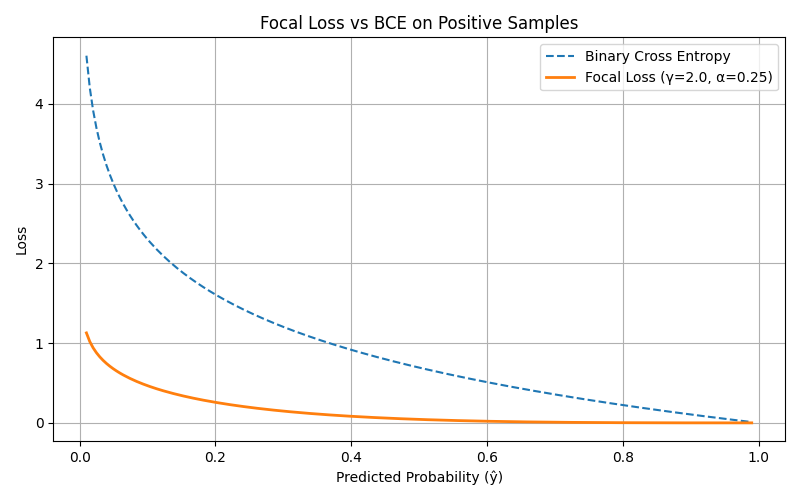

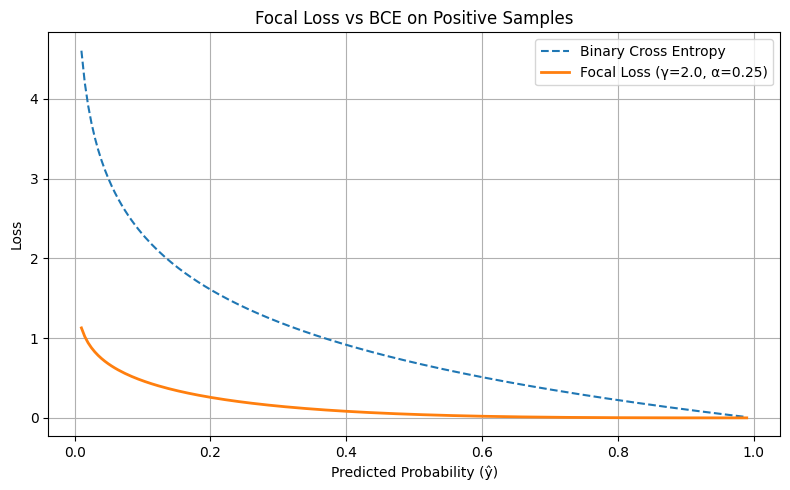

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
# BCE 与 Focal Loss 对比


# 构造预测概率
y_pred_range = np.linspace(0.01, 0.99, 200)
y_true_pos = np.ones_like(y_pred_range)  # 正类样本

# BCE 与 Focal Loss 对比
bce_vals = -np.log(y_pred_range)
focal_vals = np.array([
    binary_focal_loss(np.array([1]), np.array([p]), gamma=2.0, alpha=0.25)
    for p in y_pred_range
])

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(y_pred_range, bce_vals, label='Binary Cross Entropy', linestyle='--')
plt.plot(y_pred_range, focal_vals, label='Focal Loss (γ=2.0, α=0.25)', linewidth=2)
plt.title('Focal Loss vs BCE on Positive Samples')
plt.xlabel('Predicted Probability (ŷ)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()

# 保存图像
image_path = "/content/focal_vs_bce.png"
plt.savefig(image_path)

# 显示图像
display(Image(image_path))


### 8. Hinge Loss（合页损失）

---

#### 📖 定义

Hinge Loss 最常用于二分类，要求标签 $y \in \{-1, +1\}$，预测输出 $\hat{y}$ 是**原始打分（非概率）**。

定义为：

$$
\text{hinge}(y, \hat{y}) = \max(0, 1 - y \cdot \hat{y})
$$


---

#### 🔍 直观理解

- 如果 $$y \cdot \hat{y} \geq 1$$：分类正确且有 margin，loss 为 0
- 如果 $$y \cdot \hat{y} < 1$$：分类错误或距离超平面太近 → 有损失

---

#### ✅ 特性总结

| 特性         | 描述                                          |
|--------------|-----------------------------------------------|
| 分类边界     | 显式要求 $y \cdot \hat{y} \geq 1$              |
| 不连续梯度   | 在 margin=1 的点处不可导（可近似替代）         |
| 对误差敏感   | 对 margin 较小的预测更严苛                    |
| 不输出概率   | 不适合用在概率预测问题（非 sigmoid/softmax）   |

---

#### 🧠 一句话理解：

> “Hinge Loss 惩罚那些靠近或越过分类边界的样本，让模型学出一个明确的 margin。”

---

#### 📦 应用实例

- 支持向量机（SVM）原生使用
- 也可用于深度模型中作为替代 BCE 的 margin-based 分类方法
- 多分类扩展形式为 **Multiclass Hinge Loss / Structured SVM**



In [1]:
import numpy as np

def hinge_loss(y_true, y_pred):
    """
    Hinge Loss 实现

    参数:
    y_true -- 真实标签（应为 +1 或 -1）
    y_pred -- 预测值（可以是 margin 或 logit）

    返回:
    Hinge Loss 的平均值
    """
    loss = np.maximum(0, 1 - y_true * y_pred)
    return np.mean(loss)

# 示例
y_true = np.array([1, -1, 1, -1])
y_pred = np.array([0.8, -0.5, 0.3, -0.9])  # 可以是 SVM 输出的 margin

print("Hinge Loss =", hinge_loss(y_true, y_pred))


Hinge Loss = 0.375
